<AxesSubplot:>

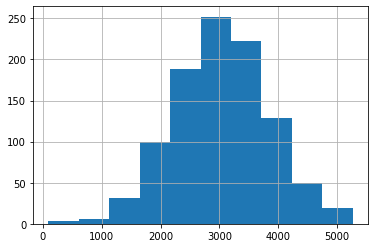

In [1]:
# qcutで顧客分析
import numpy as np
import pandas as pd
import random

# 平均売上3000円のデータを作成
dat = pd.Series([round(random.gauss(3000,800)) for i in range(1000)])

# 分布をみておく
dat.hist()

In [2]:
# 売上をもとにユーザーを均等に分割
dec_label = ['d' + str(i + 1) for i in range(10)]
dec = pd.qcut(dat,10,dec_label)

df = pd.DataFrame({'sales':dat,'dec':dec})

In [16]:
# 集計
# 個数、グループ内合計売上、グループ内平均
df_agg = df.groupby(dec).agg([len,sum,np.mean])
df_agg.columns = ['count','total_of_sales','mean_of_sales']

# 表計算
# 全体売上に対するグループ売上の割合、割合の累計、割合が何番目か
df_agg['rate_of_total_sales'] = df_agg.total_of_sales/df_agg.total_of_sales.sum()
df_agg['cumrate_of_total_sales'] = df_agg.total_of_sales.cumsum()/df_agg.total_of_sales.sum()
df_agg['rank_of_rate'] = df_agg.rate_of_total_sales.rank(ascending=False)

df_agg

,count,total_of_sales,mean_of_sales,rate_of_total_sales,cumrate_of_total_sales,rank_of_rate
d1,100,160848,1608.480000,0.052976,0.052976,10.0
d2,100,220507,2205.070000,0.072625,0.125600,9.0
d3,101,252817,2503.138614,0.083266,0.208866,8.0
d4,99,270813,2735.484848,0.089193,0.298059,7.0
d5,100,294628,2946.280000,0.097037,0.395096,6.0
d6,101,317725,3145.792079,0.104644,0.499739,5.0
d7,99,330329,3336.656566,0.108795,0.608534,4.0
d8,101,360084,3565.188119,0.118595,0.727129,3.0
d9,99,382541,3864.050505,0.125991,0.853120,2.0
d10,100,445967,4459.670000,0.146880,1.000000,1.0


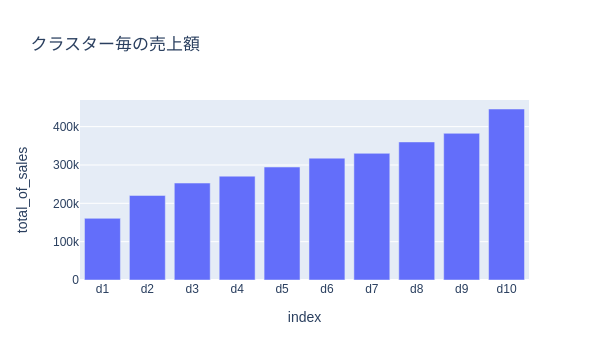

In [17]:
# plot
# import matplotlib.pyplot as plt
import plotly.express as px
# sns.bar(data = df_agg, y="total_of_sales")
px.bar(df_agg, y="total_of_sales", title="クラスター毎の売上額")

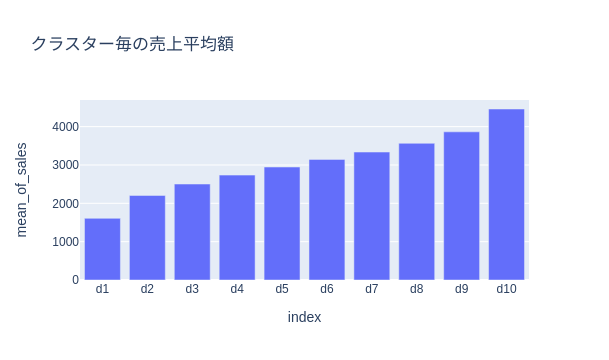

In [18]:
px.bar(df_agg, y="mean_of_sales", title="クラスター毎の売上平均額")

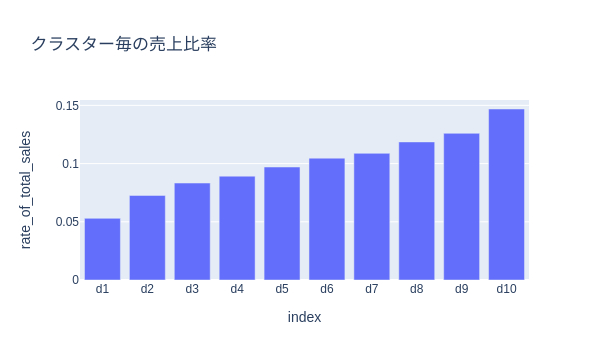

In [19]:
px.bar(df_agg, y="rate_of_total_sales", title="クラスター毎の売上比率")

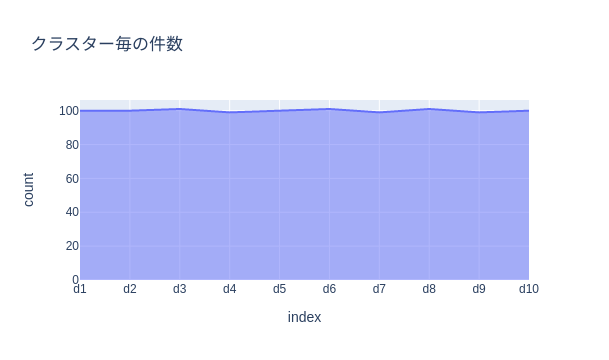

In [20]:
px.area(df_agg, y="count", title="クラスター毎の件数")

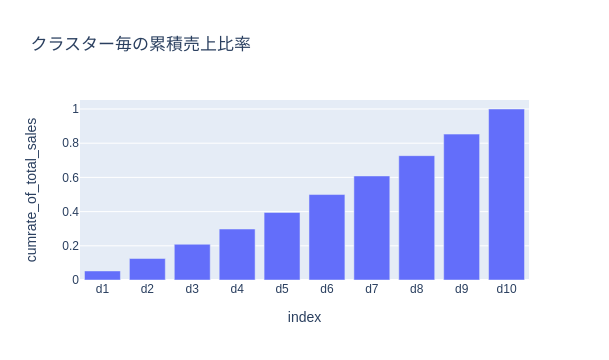

In [21]:
px.bar(df_agg, y="cumrate_of_total_sales", title="クラスター毎の累積売上比率")